In [ ]:
from google.colab import files
uploaded = files.upload()


Saving treatment.csv to treatment.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
treatment = pd.read_csv("treatment.csv", sep="\t")
treatment.sample(3)

,treat,age,educ,ethn,married,re74,re75,re78,u74,u75
151,True,33,12,black,True,20280.0,10941.4,15952.6,False,False
14,True,27,13,black,False,0.0,0.0,14581.9,True,True
1650,False,55,12,other,True,23511.2,26854.8,26599.1,False,False


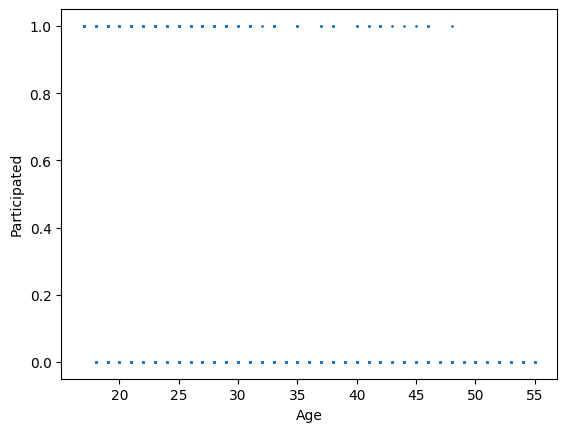

In [ ]:
_ = plt.scatter(treatment.age, treatment.treat, s=1)
_ = plt.xlabel("Age")
_ = plt.ylabel("Participated")
_ = plt.show()

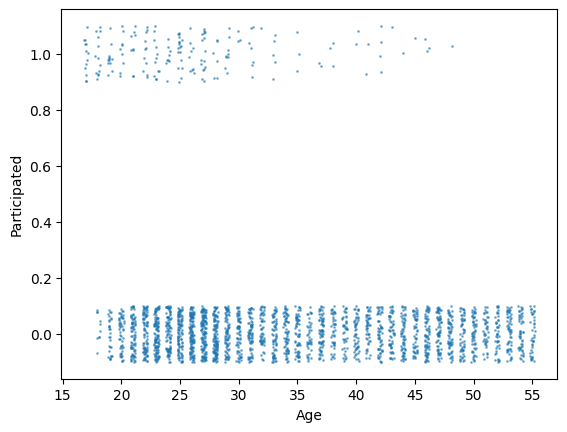

In [ ]:
x = treatment.age + np.random.uniform(-0.2, 0.2, size=len(treatment))

y = treatment.treat + np.random.uniform(-0.1, 0.1, size=len(treatment))
_ = plt.scatter(x, y, s=1, alpha=0.5)
_ = plt.xlabel("Age")
_ = plt.ylabel("Participated")
_ = plt.show()

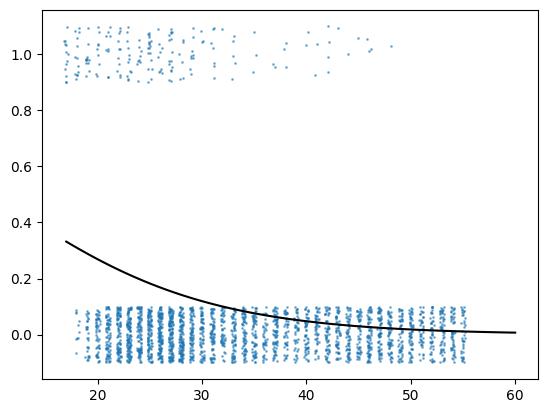

In [ ]:
age = np.linspace(17,60, 100)
beta0 = 1
beta1 = -0.1
eta = beta0 + age*beta1
pr = 1/(1 + np.exp(-eta))
_ = plt.plot(age, pr, c="black")
_ = plt.scatter(x, y, s=1, alpha=0.5)

_ = plt.show()

In [ ]:
T = treatment.treat.astype(int)

In [ ]:
import statsmodels.formula.api as smf
m = smf.logit('T ~ age', data=treatment).fit()

Optimization terminated successfully.
         Current function value: 0.221883
         Iterations 8


In [ ]:
m.params

Intercept    1.034257
age         -0.122942
dtype: float64

In [ ]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      T   No. Observations:                 2675
Model:                          Logit   Df Residuals:                     2673
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1176
Time:                        07:09:21   Log-Likelihood:                -593.54
converged:                       True   LL-Null:                       -672.65
Covariance Type:            nonrobust   LLR p-value:                 2.760e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0343      0.330      3.135      0.002       0.388       1.681
age           -0.1229      0.012    -10.052      0.000      -0.147      -0.099
==============================================================================
"""

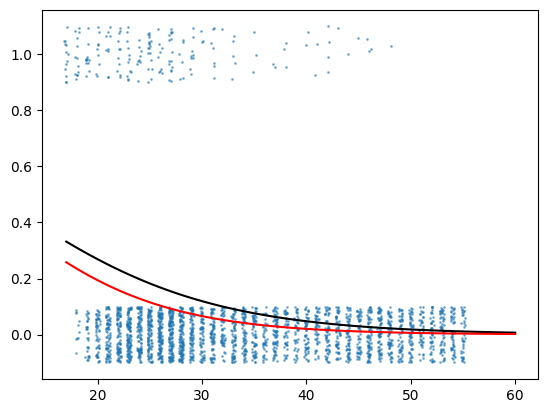

In [ ]:
age = np.linspace(17,60, 100)

beta0 = 1
beta1 = -0.1
eta = beta0 + age*beta1
pr = 1/(1 + np.exp(-eta))
_ = plt.plot(age, pr, c="black")
etaX = m.params[0] + m.params[1]*age

prX = 1/(1 + np.exp(-etaX))

_ = plt.plot(age, prX, c="red")
_ = plt.scatter(x, y, s=1, alpha=0.5)

_ = plt.show()

In [ ]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      T
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0075      0.001     -9.181      0.000      -0.009      -0.006
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()

In [ ]:
X = treatment[["age"]]
y = treatment.treat

In [ ]:
_ = m.fit(X, y)

In [ ]:
m.intercept_

array([1.03377561])

In [ ]:
m.coef_

array([[-0.12292312]])

In [ ]:
m.score(X, y)

0.930841121495327

####What is a generator in Python, and how does it differ from a regular function?

Python generator functions allow you to declare a function that behaves like an iterator, making it a faster, cleaner and easier way to create an iterator. An iterator is an object that can be iterated or looped upon. It is used to abstract a container of data to make it behave like an iterable object. Examples of iterable objects that are used more commonly include lists, dictionaries and strings.
we never explicitly defined the __iter__ method, the __next__ method or raised a StopIteration exception. These are handled implicitly by generators, making programming much easier and simpler to understand.

In [ ]:
def get_odds_generator():
    n=1

    n+=2
    yield n

    n+=2
    yield n

    n+=2
    yield n

numbers=get_odds_generator()
print(next(numbers))
print(next(numbers))
print(next(numbers))


3
5
7


###Explain the concept of a decorator in Python. Provide an example of how you would use it to measure the execution time of a function.

Decorators are Python functions that allow you to wrap another function as an input and modify its behavior without altering the wrapped function’s code. They are used to extend the behavior of a particular object, such as a class, method, or function. This approach promotes reusability, modularity, and separation of concerns in your Python programs.
The syntax for a decorator in Python is quite simple. It starts with the keyword 'def' to define a function, followed by an (@) and the name of the decorator. After that, you can add any arguments needed and then pass your target function as an argument.

In [ ]:
def simple_decorator(func):

    def wrapper():

      print("Before function execution")

    func()

    print("After function execution")

    return wrapper

@simple_decorator

def greet():

    print("Hello, world!")

greet()

Hello, world!
After function execution
Before function execution


###What are metaclasses in Python? Provide a practical example where you would use a metaclass.

A metaclass is a class that allows for other classes to be instantiated as objects of the metaclass.

In our example, the type class is an example of a metaclass, and the list class is an instance (or object) of the type class.
, we’ve created a metaclass SingletonMeta which inherits from type. The __call__ method is called when an instance of SingletonClass is created.

The __call__ method checks if an instance of the class already exists in _instances. If not, it creates a new instance using super().__call__(*args, **kwargs) and stores it in _instances. Subsequent calls to create an instance of SingletonClass will return the existing instance.

####Discuss the differences between _getattr() and __getattribute_() methods in Python. When would you use one over the other?

The main difference between __getattr__ and __getattribute__ is that if the attribute was not found by the usual way then __getattr__ is used.

Whereas the __getattribute__ is used before looking at the actual attributes on the object. You will have to use it more consciously otherwise very easily you can end up in infinite recursions.
__getattribute__ is invoked before looking at the actual attributes on the object, and so can be tricky to implement correctly. You can end up in infinite recursions very easily.

New-style classes derive from object, old-style classes are those in Python 2.x with no explicit base class. But the distinction between old-style and new-style classes is not the important one when choosing between __getattr__ and __getattribute__.

###What is the purpose of the _slots_ attribute in Python classes? How does it affect memory usage and object initialization?

Slots are a mechanism that allow you to declare class attributes and restrict the creation of other attributes.
Slots are especially beneficial in programs where you have a large number of class instances with a known set of attributes. Think of a video games or physics simulations; in these situations you track a large number of entities over time.
 can add slots to your class adding a single line of code but is this always a good idea
 You can improve a class’ memory usage and performance by making it use slots. A class with slots takes up less memory and executes faster.




Explain the concept of context managers in Python and provide examples of built-in and custom context managers.

Context managers in Python provide a convenient way to manage resources, such as file handling or database connections. They ensure that resources are properly acquired and released, improving code readability and preventing resource leaks. The most common use of context managers is with the with statement.
Consider a simple example of file handling. When working with files, it is essential to open and close them properly to release system resources. Failing to close files can lead to memory leaks and other issues. Context managers simplify this process. Here's a basic example using the built-in file context manager

Python provides several built-in context managers, simplifying the management of various resources. These built-in context managers cover tasks such as file handling, network connections, and database transactions. For instance, the sqlite3 module offers a context manager for working with SQLite databases

Creating Custom Context Managers
While Python's built-in context managers are valuable, there are scenarios where custom context managers are beneficial. Custom context managers are user-defined classes that implement the __enter__ and __exit__ methods.
__enter__ Method: This method is called when entering the with block and is responsible for setting up the context. It can perform tasks like resource initialisation.
__exit__ Method: This method is executed when exiting the with block. It handles resource cleanup and any necessary teardown procedures. It also receives information about exceptions, allowing specific actions to be taken based on whether an exception occurred.
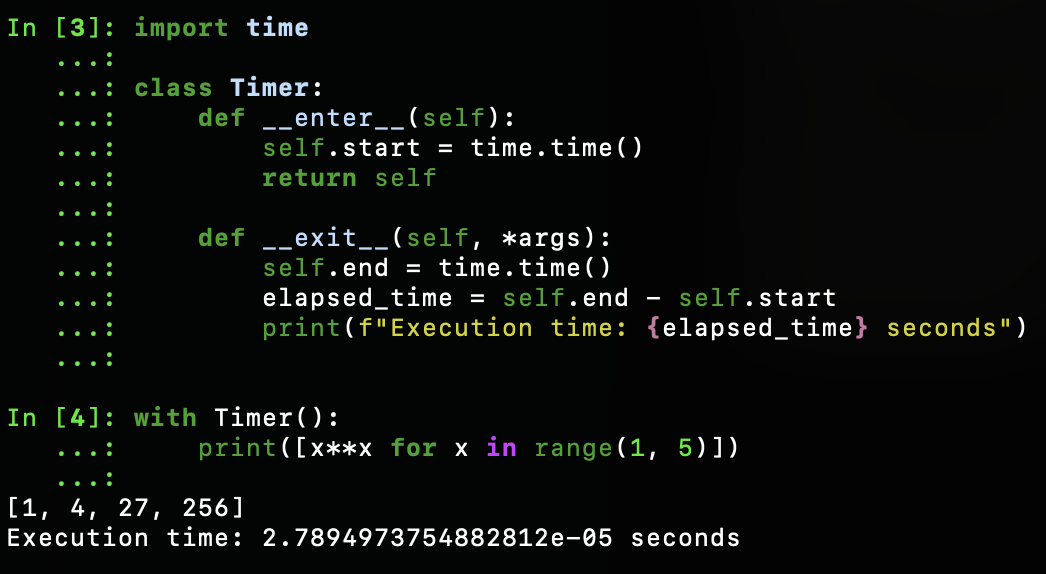

###Discuss the use of the async and await keywords in Python. When would you use asynchronous programming, and what are its benefits?

The async keyword in Python is used to declare a function as a “coroutine.” A coroutine is a special kind of function that can be paused and resumed, allowing Python to handle other tasks in the meantime. The await keyword is used inside an async function to call another async function and wait for it to finish.The function being called with await is also a coroutine.

In [ ]:
import asyncio

async def say_hello():
    await asyncio.sleep(1)
    print('Hello, World!')

asyncio.run(say_hello())




In this code, we define a coroutine say_hello() using the async def syntax. Inside this function, we use the await keyword to call asyncio.sleep(1), which is a coroutine that pauses execution for one second. After the pause, we print ‘Hello, World!’. Finally, we use asyncio.run(say_hello()) to execute our coroutine.

This is the basic usage of Python’s async feature. The power of async becomes more evident when we start working with multiple coroutines and I/O-bound tasks, which we’ll dive into in the next sections.

Asynchronous programming is very effective for applications that depend on high volumes of networking and disk I/O. Using non-blocking asynchronous calls, the app can initiate multiple operations and handle the results as they complete instead of waiting. This takes advantage of parallelism and improves speed.

Some examples include web servers handling multiple connections, databases managing concurrent queries, and asynchronous systems interacting with hardware devices. Going asynchronous improves throughput and scalability for high I/O apps

####Explain the GIL (Global Interpreter Lock) in Python. How does it impact concurrency, and what are some strategies to work around it?

The Global Interpreter Lock (GIL) is a mutex (lock) that protects access to Python objects, preventing multiple native threads from executing Python bytecode at once. In simple terms, it allows only one thread to execute Python bytecode in the interpreter at any given time, even in a multi-core system

Python's Global Interpreter Lock (GIL) is a design choice that simplifies memory management and C extensions but introduces limitations in leveraging multicore CPUs for CPU-bound tasks. Understanding the GIL's impact on multithreading helps in selecting the right concurrency strategy based on the nature of tasks. Mitigating GIL limitations through multiprocessing, asynchronous I/O, and optimized C extensions enables developers to maximize Python's potential in various scenarios.

By comprehending the implications of the GIL and employing appropriate strategies, developers can strike a balance between performance and simplicity in multithreaded Python applications, catering to different use cases effectively.

###What are some common design patterns used in Python? Provide examples of when you would use each pattern.*

PROGRAM TO AN INTERFACE NOT AN IMPLEMENTATION
 Duck Typing. In Python we don’t like to define interfaces and program classes according these interfaces, do we? But, listen to me! This doesn’t mean we don’t think about interfaces, in fact with Duck Typing we do that all the time.

Let’s say some words about the infamous Duck Typing approach to see how it fits in this paradigm: program to an interface.

try:
    bird.quack()
except AttributeError:
    self.lol()

    Behavioral Patterns
Behavioural Patterns involve communication between objects, how objects interact and fulfil a given task. According to GOF principles, there are a total of 11 behavioral patterns in Python: Chain of responsibility, Command, Interpreter, Iterator, Mediator, Memento, Observer, State, Strategy, Template, Visitor.
 these patterns very useful, but this does not mean the other pattern groups are not.

ITERATOR
Iterators are built into Python. This is one of the most powerful characteristics of the language. Years ago

CHAIN OF RESPONSIBILITY
This pattern gives us a way to treat a request using different methods, each one addressing a specific part of the request. You know, one of the best principles for good code is the Single Responsibility principle.

Every piece of code must do on
This principle is deeply integrated in this design pattern.

For example, if we want to filter some content we can implement different filters, each one doing one precise and clearly defined type of filtering. These filters could be used to filter offensive words, ads, unsuitable video content, and so on.
class ContentFilter(object):
    def __init__(self, filters=None):
        self._filters = list()
        if filters is not None:
            self._filters += filters

    def filter(self, content):
        for filter in self._filters:
            content = filter(content)
        return content

filter = ContentFilter([
                offensive_filter,
                ads_filter,
                porno_video_filter])
filtered_content = filter.filter(content)



##Discuss the use of Python's multiprocessing module for parallel computing. How does it differ from the threading module, and when would you choose one over the other?
Multiprocessing is a technique where parallelism in its truest form is achieved. Multiple processes are run across multiple CPU cores, which do not share the resources among them. Each process can have many threads running in its own memory space. In Python, each process has its own instance of Python interpreter doing the job of executing the instructions.
Now, let’s jump into the program where we try to execute two different types of functions: IO-bound and CPU-bound in six different ways. Inside the IO-bound function, we ask the CPU to sit idle and pass time whereas, inside the CPU-bound function, the CPU is going to be busy churning out a few numbers.

Multithreading is a technique where multiple threads are spawned by a process to do different tasks, at about the same time, just one after the other. This gives you the illusion that the threads are running in parallel, but they are actually run in a concurrent manner. In Python, the Global Interpreter Lock (GIL) prevents the threads from running simultaneously.

